<a href="https://colab.research.google.com/github/Avery1493/2019-US-Student-Loan-Debt-by-Location-and-Age/blob/master/Student_Loan_Exploratory_Data_File.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [0]:
#Importing Libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#SITE WERE DATA CAN BE FOUND
#https://studentaid.gov/data-center/student/portfolio
#Using Portfolio by Location and Portfolio by Location and Age

# Reading In Files

In [43]:
#LOADING FILES FROM DESKTOP
from google.colab import files
uploaded = files.upload()


Saving Portfolio by Location and Age.xlsx to Portfolio by Location and Age (1).xlsx
Saving Portfolio by Location.xlsx to Portfolio by Location (1).xlsx


In [0]:
#READING IN 2 FILES (added state abbreviations column in excel)
location = pd.read_excel('Portfolio by Location.xlsx')
location_age = pd.read_excel('Portfolio by Location and Age.xlsx')

In [46]:
# LOCATION DF
location = pd.DataFrame(location)
print(location.shape)
location.head()

(52, 4)


,Location,State,Balance (in billions),Borrowers (in thousands)
0,Alabama,AL,21.5,600.3
1,Alaska,AK,2.2,66.2
2,Arizona,AZ,28.5,836.6
3,Arkansas,AR,11.9,368.7
4,California,CA,135.0,3834.5


In [47]:
location.describe()

,Balance (in billions),Borrowers (in thousands)
count,52.000000,52.000000
mean,26.794231,773.544231
std,28.548668,811.042129
min,1.500000,51.900000
25%,6.750000,217.300000
50%,18.650000,552.800000
75%,29.825000,870.825000
max,135.000000,3834.500000


In [48]:
print('Average Outstanding Debt per person(in thousands):',round(location.describe().iloc[1,0] / location.describe().iloc[1,1] * 1000,5))

Average Outstanding Debt per person(in thousands): 34.63827


In [49]:
#LOCATION BY AGE DF
location_age = pd.DataFrame(location_age)
print(location_age.shape)
location_age.tail()

(52, 12)


,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers
47,Virginia,VA,3.45,218.8,13.93,368.3,14.13,286.0,6.13,128.7,1.54,33.8
48,Washington,WA,1.72,128.0,8.93,278.0,10.13,233.1,4.04,97.4,1.19,28.6
49,West Virginia,WV,0.63,44.5,2.36,74.2,2.66,68.6,0.89,25.6,0.23,6.7
50,Wisconsin,WI,2.52,170.3,8.39,267.7,7.49,182.7,2.85,72.9,0.69,17.9
51,Wyoming,WY,0.10,9.2,0.49,18.3,0.65,16.6,0.23,6.0,0.07,1.8


# EDA

# Total Balance by Location

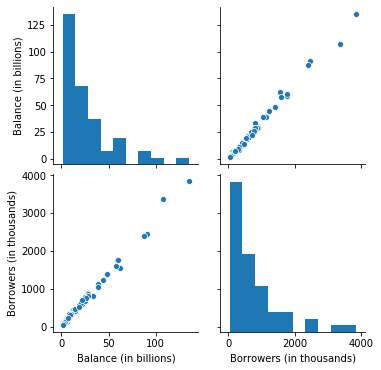

In [50]:
#PAIRPLOT OF LOCATION DF
a = sns.pairplot(location)

# As the number of borrowers increase, so does
# the oustanding loan and interest balance 
# x and y are in different units

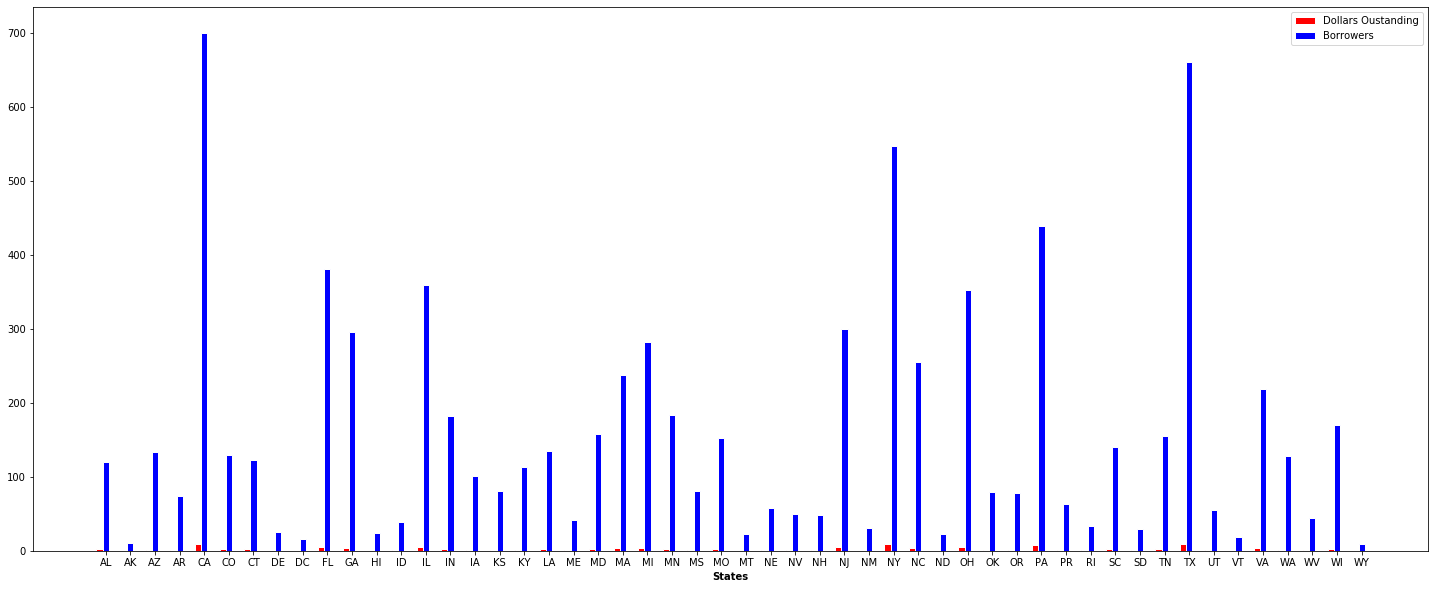

In [51]:
#PLOTTING BALANCE AND BORROWERS SIDE BY SIDE
#IN DIFFERENT UNITS (billions/thousands)

plt.figure(figsize=(25,10))

#set bar width
barWidth = .25

#set bar height
bar1 = location_age['24_or_Younger_Dollars_Outstanding']
bar2 = location_age['24 _Borrowers']

#set positon of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]

#make the plot
plt.bar(r1, bar1, color = 'red', width = barWidth, edgecolor = 'white', label = 'Dollars Oustanding')
plt.bar(r2, bar2, color = 'blue', width = barWidth, edgecolor = 'white',label = 'Borrowers')

#Add xticks in middle of the group bars
plt.xlabel('States', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bar1))], location_age['State'])

#Create Legend
plt.legend()
plt.show()

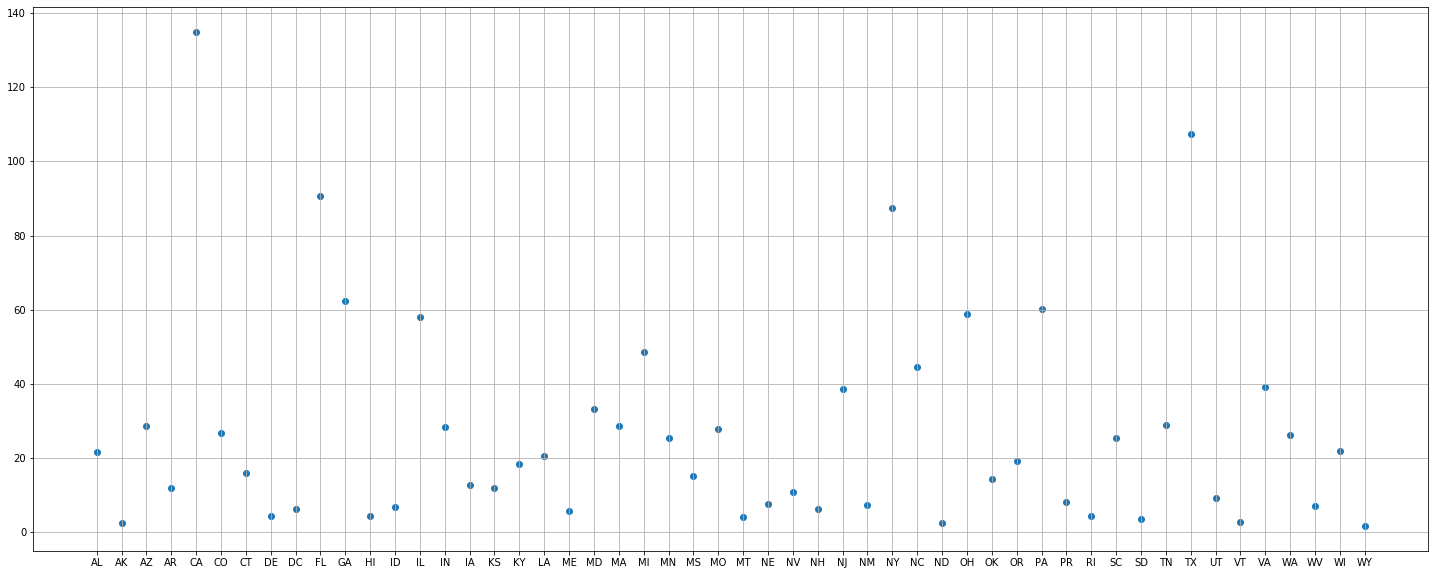

In [52]:
#PLOTING DEBT BALANCE BY STATE
plt.figure(figsize=(25,10))
plt.scatter(location['State'],location['Balance (in billions)'])
plt.grid()
plt.show();

# Most states seem to have a balance below 60 billion,
# with CA, FL, GA, NY, PA, and TX being outliers

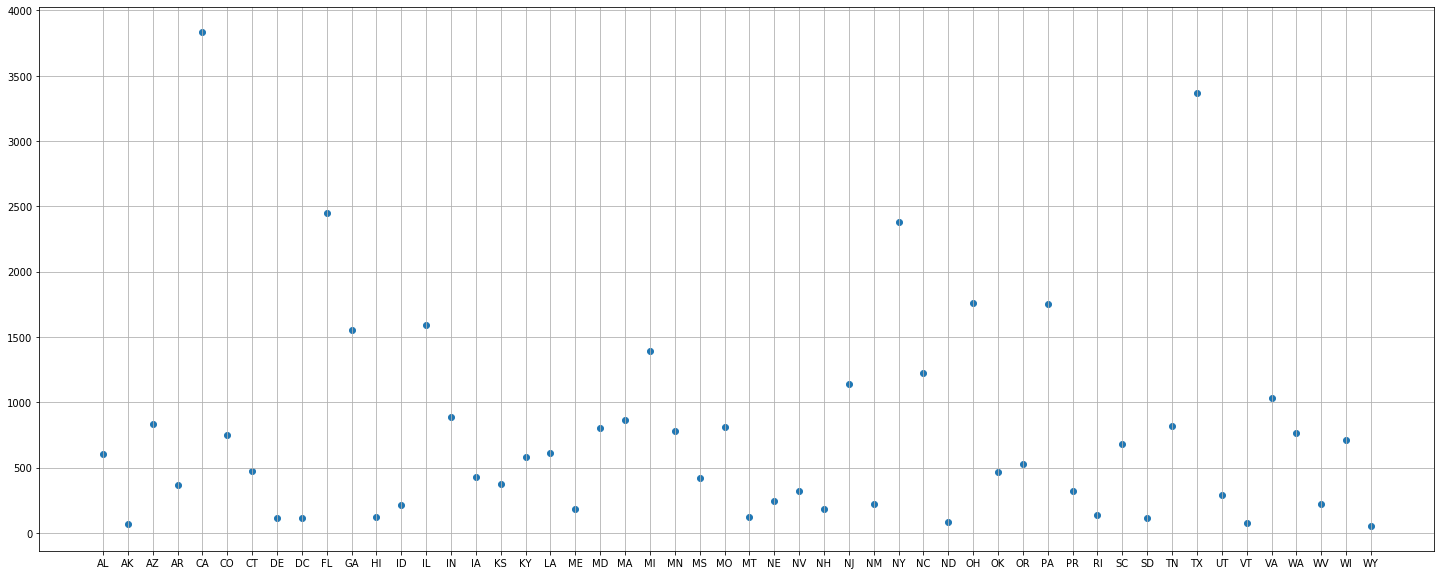

In [53]:
#PLOTING # of Borrowers BY STATE
plt.figure(figsize=(25,10))
plt.scatter(location['State'],location['Borrowers (in thousands)'])
plt.grid()
plt.show();

# CA, FL, GA, IL, NY, OH, PA, and TX 
# have over 1500,000 borrowers 

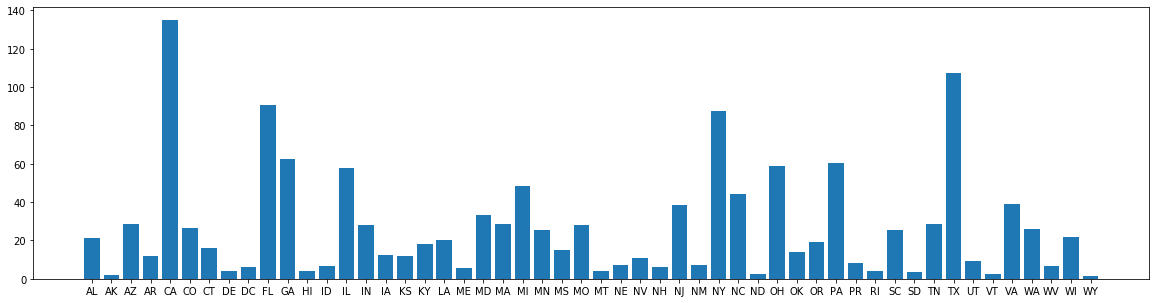

In [54]:
#PLOTING # of Borrowers BY STATE BAR GRAPH
plt.figure(figsize=(20,5))
plt.bar(location_age['State'], location['Balance (in billions)']);


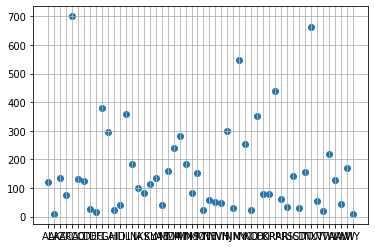

In [55]:
#PLOTING # of Borrowers 24 and Younger BY STATE
plt.scatter(location_age['State'], location_age['24 _Borrowers'])
plt.grid()
plt.show()

# CA, FL, IL, NY, OH, PA, and TX 
# have the most 

In [56]:
#SORTING LOCATION DF From Largest to Smallst Outstanding Debt
location.sort_values(by=['Balance (in billions)'], ascending=False)

,Location,State,Balance (in billions),Borrowers (in thousands)
4,California,CA,135.0,3834.5
44,Texas,TX,107.3,3367.8
9,Florida,FL,90.8,2450.8
32,New York,NY,87.3,2382.0
10,Georgia,GA,62.4,1552.9
38,Pennsylvania,PA,60.2,1753.7
35,Ohio,OH,58.9,1756.1
13,Illinois,IL,57.9,1594.3
22,Michigan,MI,48.4,1393.4
33,North Carolina,NC,44.4,1225.9


Google search of states sorted by population: 

TOP 5
*   California 
*   Texas
*   New York
*   Florida
*   Illinois

Bottom 5
*   South Dakota
*   Alaska
*   North Dakota
*   Vermont
*   Wyoming


Outstanding balance of debt balance seems to correspond well with state population

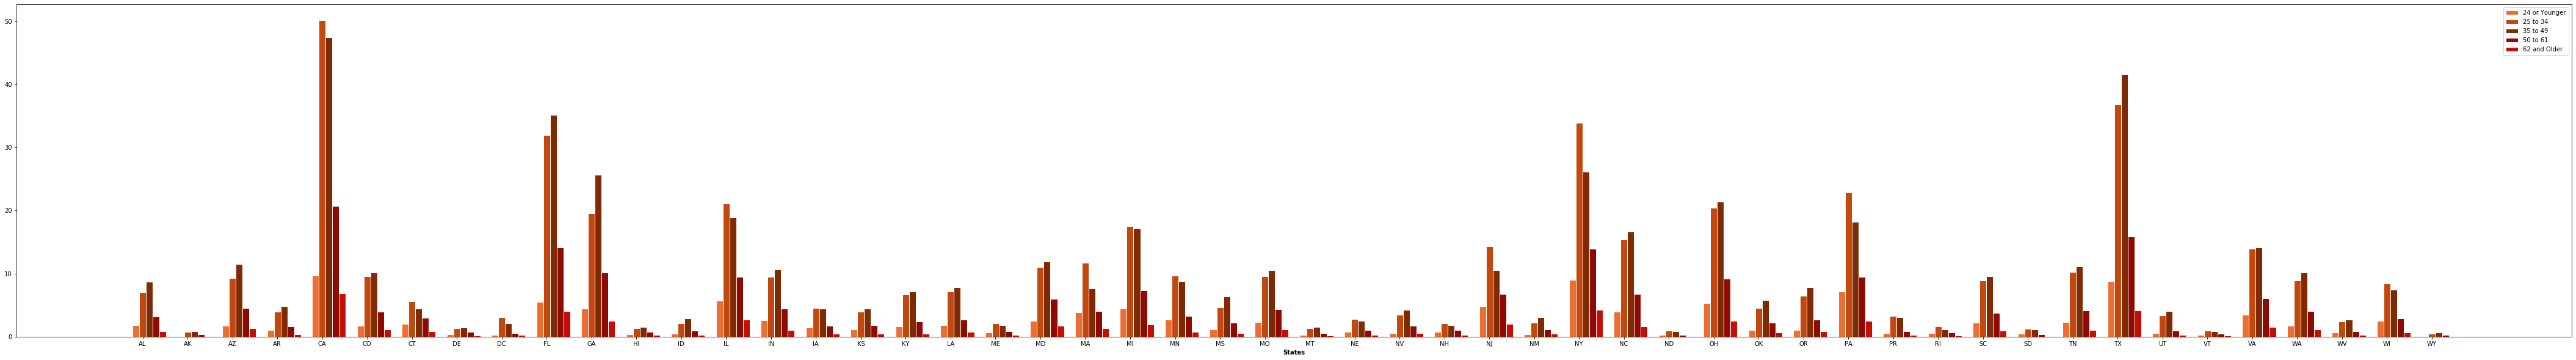

In [57]:
#Outstanding Debt By State by Age Range
plt.figure(figsize=(75,10))

#set bar width
barWidth = .15

#set bar height
bar1 = location_age['24_or_Younger_Dollars_Outstanding']
bar2 = location_age['25_to_34_Dollars_Outstanding']
bar3 = location_age['35_to_49_Dollars_Outstanding']
bar4 = location_age['50_to_61_Dollars_Outstanding']
bar5 = location_age['62_and_Older_Dollars_Outstanding']

#set positon of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#make the plot
plt.bar(r1, bar1, color = '#eb6e34', width = barWidth, edgecolor = 'white', label = '24 or Younger')
plt.bar(r2, bar2, color = '#c24810', width = barWidth, edgecolor = 'white',label = '25 to 34')
plt.bar(r3, bar3, color = '#802a03', width = barWidth, edgecolor = 'white',label = '35 to 49')
plt.bar(r4, bar4, color = '#8f0a03', width = barWidth, edgecolor = 'white',label = '50 to 61')
plt.bar(r5, bar5, color = '#c40f06', width = barWidth, edgecolor = 'white',label = '62 and Older')

#Add xticks in middle of the group bars
plt.xlabel('States', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bar1))], location_age['State'])

#Create Legend
plt.legend()
plt.show()

#For each state, the 24 to 34 and the 35 to 49 age ranges 
# owe the most student loan debt total

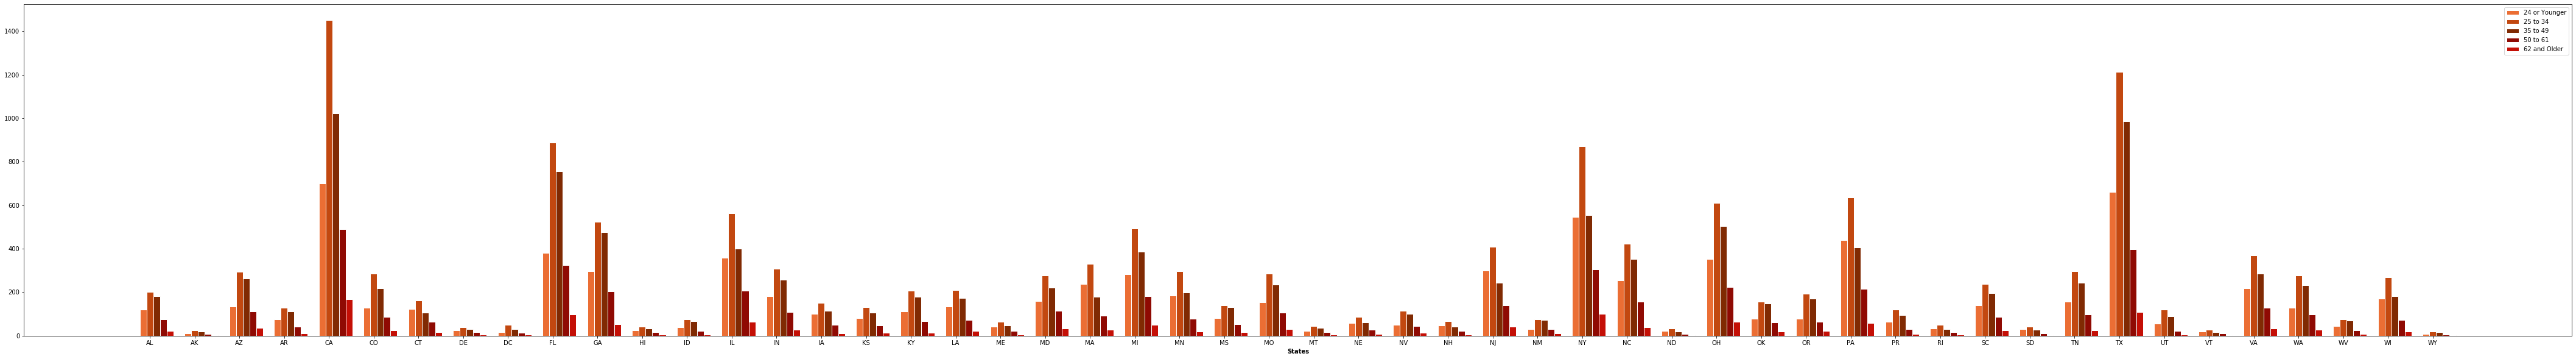

In [58]:
#Borrowers' Age vs State
plt.figure(figsize=(75,10))

#set bar width
barWidth = .15

#set bar height
bar1 = location_age['24 _Borrowers']
bar2 = location_age['25 _Borrowers']
bar3 = location_age['35 _Borrowers']
bar4 = location_age['50 _Borrowers']
bar5 = location_age['62 _Borrowers']

#set positon of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#make the plot
plt.bar(r1, bar1, color = '#eb6e34', width = barWidth, edgecolor = 'white', label = '24 or Younger')
plt.bar(r2, bar2, color = '#c24810', width = barWidth, edgecolor = 'white',label = '25 to 34')
plt.bar(r3, bar3, color = '#802a03', width = barWidth, edgecolor = 'white',label = '35 to 49')
plt.bar(r4, bar4, color = '#8f0a03', width = barWidth, edgecolor = 'white',label = '50 to 61')
plt.bar(r5, bar5, color = '#c40f06', width = barWidth, edgecolor = 'white',label = '62 and Older')

#Add xticks in middle of the group bars
plt.xlabel('States', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bar1))], location_age['State'])

#Create Legend
plt.legend()
plt.show()

#For each state, there are more borrowers in the  
# 24 to 34 and the 35 to 49 age ranges

# Average Balance by Location

In [59]:
#ORIGINAL IMPORTED location data
location = pd.DataFrame(location)
print(location.shape)
location.sample(5)

(52, 4)


,Location,State,Balance (in billions),Borrowers (in thousands)
10,Georgia,GA,62.4,1552.9
13,Illinois,IL,57.9,1594.3
8,District of Columbia,DC,6.2,115.7
28,Nevada,NV,10.6,323.5
29,New Hampshire,NH,6.0,184.8


In [60]:
#SAVING A COPY TO NEW DF avg_location
avg_location = location.copy()
avg_location.head()

,Location,State,Balance (in billions),Borrowers (in thousands)
0,Alabama,AL,21.5,600.3
1,Alaska,AK,2.2,66.2
2,Arizona,AZ,28.5,836.6
3,Arkansas,AR,11.9,368.7
4,California,CA,135.0,3834.5


In [62]:
#ADDING COLUMN TO SHOW AVERAGE DEBT BALANCE PER BORROWER OF EACH STATE
avg_location['Average Balance (in thousands)'] = round((avg_location['Balance (in billions)'] / avg_location['Borrowers (in thousands)'])*1000,2)
avg_location.sample(5)

,Location,State,Balance (in billions),Borrowers (in thousands),Average Balance (in thousands)
30,New Jersey,NJ,38.6,1135.9,33.98
42,South Dakota,SD,3.4,111.6,30.47
34,North Dakota,ND,2.4,83.3,28.81
0,Alabama,AL,21.5,600.3,35.82
6,Connecticut,CT,15.9,471.2,33.74


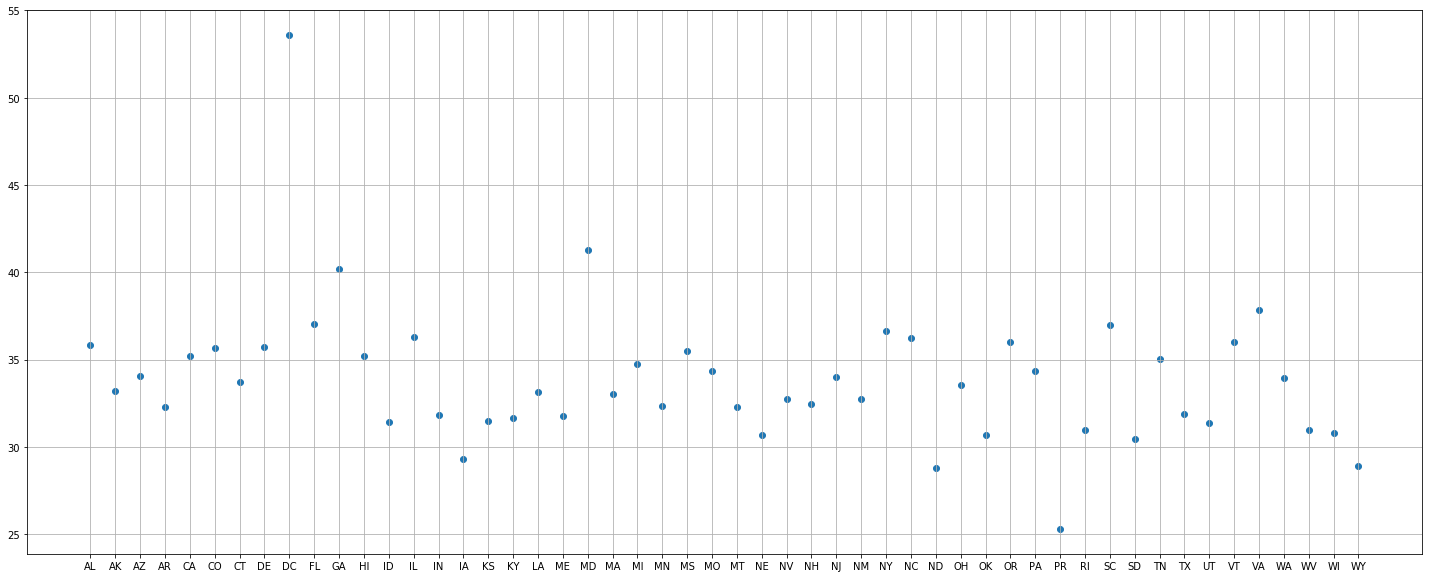

In [63]:
#PLOTTING STATE VS AVERAGE DEBT OUSTANDING PER BORROWER
plt.figure(figsize=(25,10))
plt.scatter(avg_location['State'],avg_location['Average Balance (in thousands)'])
plt.grid()
plt.show();

# The average borrower in most states owe between 30 and 40K
# DC and PR outliers; both not states, but would be intersting to look into more

In [64]:
#SORTING AVERAGE BALANCE IN ASCENDING ORDER AND SAVING TO NEW DF sorted_avg
sorted_avg = avg_location.sort_values(by=['Average Balance (in thousands)'])
sorted_avg

,Location,State,Balance (in billions),Borrowers (in thousands),Average Balance (in thousands)
39,Puerto Rico,PR,8.1,320.1,25.30
34,North Dakota,ND,2.4,83.3,28.81
51,Wyoming,WY,1.5,51.9,28.90
15,Iowa,IA,12.6,429.8,29.32
42,South Dakota,SD,3.4,111.6,30.47
27,Nebraska,NE,7.4,241.3,30.67
36,Oklahoma,OK,14.2,462.9,30.68
50,Wisconsin,WI,21.9,711.5,30.78
49,West Virginia,WV,6.8,219.7,30.95
40,Rhode Island,RI,4.2,135.6,30.97


In [65]:
sorted_avg.describe()

,Balance (in billions),Borrowers (in thousands),Average Balance (in thousands)
count,52.000000,52.000000,52.000000
mean,26.794231,773.544231,33.876346
std,28.548668,811.042129,4.006276
min,1.500000,51.900000,25.300000
25%,6.750000,217.300000,31.617500
50%,18.650000,552.800000,33.385000
75%,29.825000,870.825000,35.695000
max,135.000000,3834.500000,53.590000


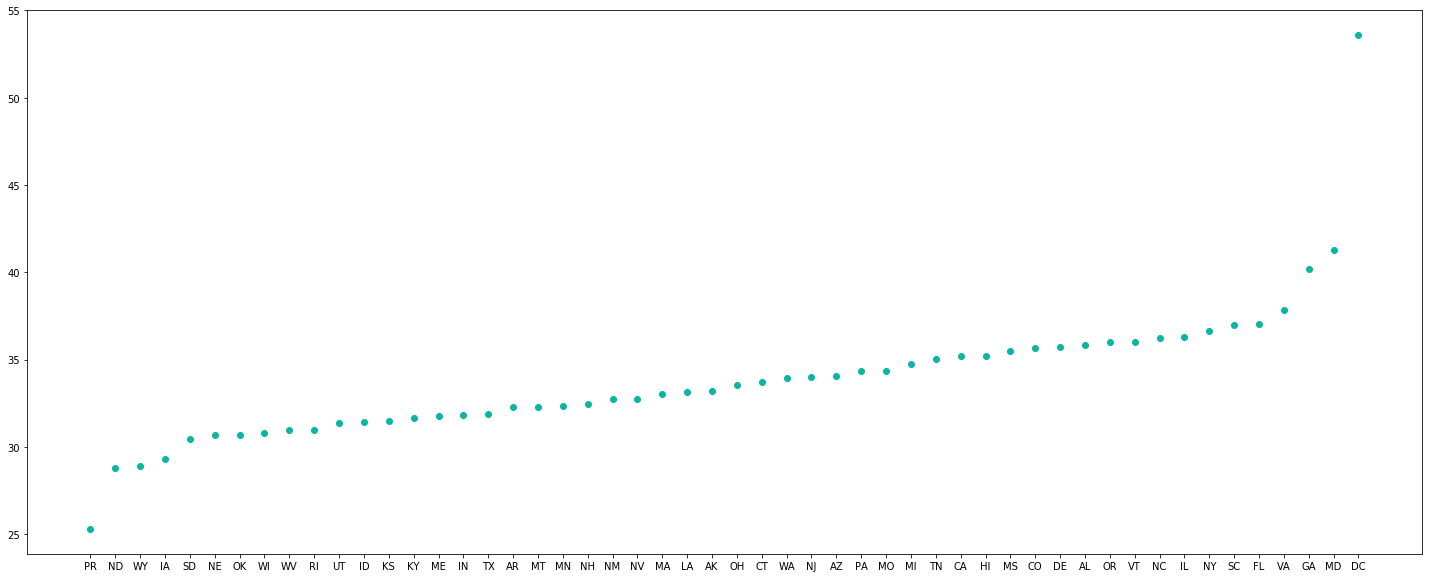

In [66]:
#PLOTTING STATE VS AVERAGE DEBT OUSTANDING PER BORROWER IN ASCENDING ORDER
plt.figure(figsize=(25,10))
plt.scatter(sorted_avg['State'],sorted_avg['Average Balance (in thousands)'],
            c='#0bb5a4', marker='o')
plt.show();

In [67]:
#ORIGINAL IMPORTED location_age data
location_age = pd.DataFrame(location_age)
print(location_age.shape)
location_age.tail()

(52, 12)


,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers
47,Virginia,VA,3.45,218.8,13.93,368.3,14.13,286.0,6.13,128.7,1.54,33.8
48,Washington,WA,1.72,128.0,8.93,278.0,10.13,233.1,4.04,97.4,1.19,28.6
49,West Virginia,WV,0.63,44.5,2.36,74.2,2.66,68.6,0.89,25.6,0.23,6.7
50,Wisconsin,WI,2.52,170.3,8.39,267.7,7.49,182.7,2.85,72.9,0.69,17.9
51,Wyoming,WY,0.10,9.2,0.49,18.3,0.65,16.6,0.23,6.0,0.07,1.8


In [68]:
#SAVING A COPY TO NEW DF avg_location_age
avg_location_age = location_age.copy()
avg_location_age.head()

,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers
0,Alabama,AL,1.78,120.7,7.03,200.4,8.72,182.0,3.15,75.2,0.81,21.6
1,Alaska,AK,0.12,10.5,0.76,25.4,0.86,20.2,0.33,7.8,0.10,2.3
2,Arizona,AZ,1.75,133.9,9.33,292.4,11.55,263.1,4.51,112.4,1.37,34.5
3,Arkansas,AR,1.00,74.3,3.99,128.0,4.86,112.2,1.62,42.6,0.41,11.3
4,California,CA,9.67,700.4,50.17,1450.7,47.50,1023.5,20.74,489.7,6.88,167.4


In [69]:
#ADDING 5 COLUMNS TO SHOW AVERAGE DEBT BALANCE PER BORROWER BY AGE RANGE IN EACH STATE
avg_location_age['24- Avg Bal (in thousands)'] = round((avg_location_age['24_or_Younger_Dollars_Outstanding'] / avg_location_age['24 _Borrowers'])*1000,2)
avg_location_age['25-34 Avg Bal (in thousands)'] = round((avg_location_age['25_to_34_Dollars_Outstanding'] / avg_location_age['25 _Borrowers'])*1000,2)
avg_location_age['35-49 Avg Bal(in thousands)'] = round((avg_location_age['35_to_49_Dollars_Outstanding'] / avg_location_age['35 _Borrowers'])*1000,2)
avg_location_age['50-61 Avg Bal (in thousands)'] = round((avg_location_age['50_to_61_Dollars_Outstanding'] / avg_location_age['50 _Borrowers'])*1000,2)
avg_location_age['62+ Avg Bal (in thousands)'] = round((avg_location_age['62_and_Older_Dollars_Outstanding'] / avg_location_age['62 _Borrowers'])*1000,2)

avg_location_age.head()

,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers,24- Avg Bal (in thousands),25-34 Avg Bal (in thousands),35-49 Avg Bal(in thousands),50-61 Avg Bal (in thousands),62+ Avg Bal (in thousands)
0,Alabama,AL,1.78,120.7,7.03,200.4,8.72,182.0,3.15,75.2,0.81,21.6,14.75,35.08,47.91,41.89,37.50
1,Alaska,AK,0.12,10.5,0.76,25.4,0.86,20.2,0.33,7.8,0.10,2.3,11.43,29.92,42.57,42.31,43.48
2,Arizona,AZ,1.75,133.9,9.33,292.4,11.55,263.1,4.51,112.4,1.37,34.5,13.07,31.91,43.90,40.12,39.71
3,Arkansas,AR,1.00,74.3,3.99,128.0,4.86,112.2,1.62,42.6,0.41,11.3,13.46,31.17,43.32,38.03,36.28
4,California,CA,9.67,700.4,50.17,1450.7,47.50,1023.5,20.74,489.7,6.88,167.4,13.81,34.58,46.41,42.35,41.10


In [0]:
#DROPPING COLUMNS DONT NEED
avg_location_age = avg_location_age[['State','24- Avg Bal (in thousands)','25-34 Avg Bal (in thousands)',
                    '35-49 Avg Bal(in thousands)','50-61 Avg Bal (in thousands)',
                    '62+ Avg Bal (in thousands)']]


In [71]:
avg_location_age.sample(5)

,State,24- Avg Bal (in thousands),25-34 Avg Bal (in thousands),35-49 Avg Bal(in thousands),50-61 Avg Bal (in thousands),62+ Avg Bal (in thousands)
40,RI,15.87,32.42,38.69,42.24,43.48
43,TN,14.57,34.39,45.81,42.04,40.64
47,VA,15.77,37.82,49.41,47.63,45.56
17,KY,14.17,32.41,39.96,35.96,34.69
31,NM,11.29,28.72,41.63,40.20,43.30


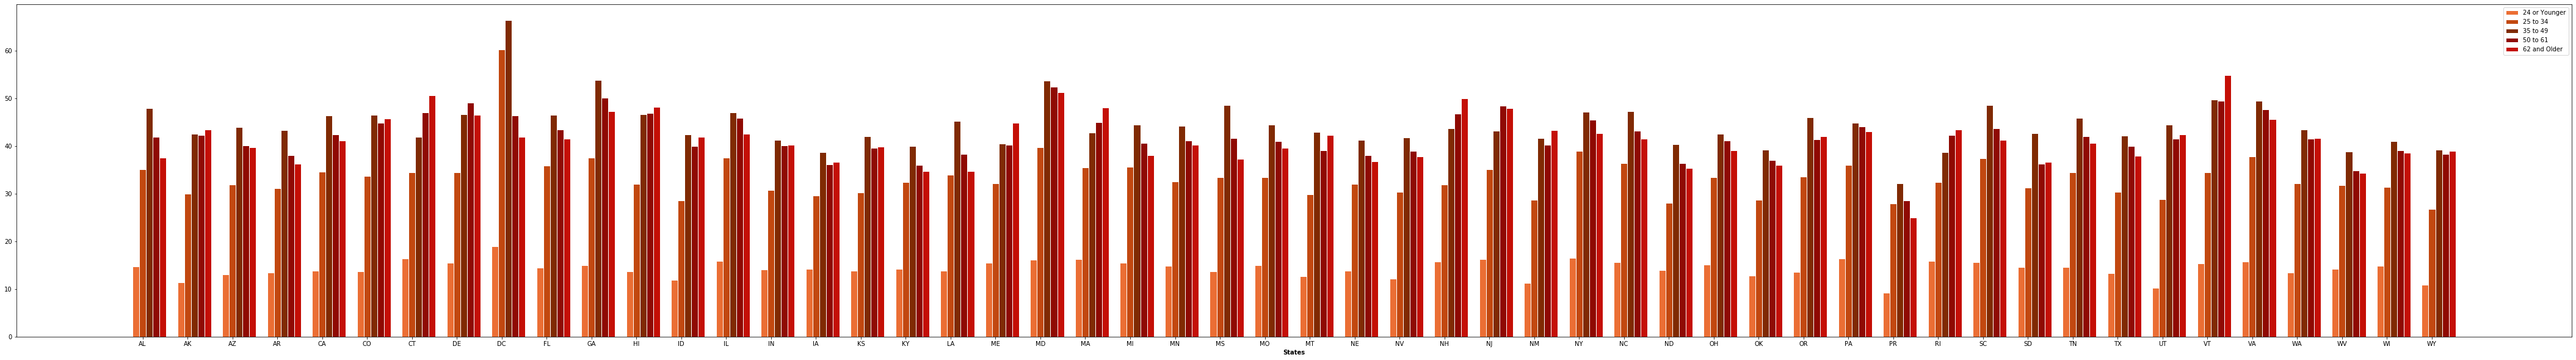

In [29]:
#Average debt by Age vs State
plt.figure(figsize=(75,10))

#set bar width
barWidth = .15

#set bar height
bar1 = avg_location_age['24- Avg Bal (in thousands)']
bar2 = avg_location_age['25-34 Avg Bal (in thousands)']
bar3 = avg_location_age['35-49 Avg Bal(in thousands)']
bar4 = avg_location_age['50-61 Avg Bal (in thousands)']
bar5 = avg_location_age['62+ Avg Bal (in thousands)']

#set positon of bar on X axis
r1 = np.arange(len(bar1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]

#make the plot
plt.bar(r1, bar1, color = '#eb6e34', width = barWidth, edgecolor = 'white', label = '24 or Younger')
plt.bar(r2, bar2, color = '#c24810', width = barWidth, edgecolor = 'white',label = '25 to 34')
plt.bar(r3, bar3, color = '#802a03', width = barWidth, edgecolor = 'white',label = '35 to 49')
plt.bar(r4, bar4, color = '#8f0a03', width = barWidth, edgecolor = 'white',label = '50 to 61')
plt.bar(r5, bar5, color = '#c40f06', width = barWidth, edgecolor = 'white',label = '62 and Older')

#Add xticks in middle of the group bars
plt.xlabel('States', fontweight = 'bold')
plt.xticks([r + barWidth for r in range(len(bar1))], location_age['State'])

#Create Legend
plt.legend()
plt.show()


# For the majority of states borrowers from the ages 
# 35-49, 50-61, and 62+ owe more per average 

# Percentages

In [72]:
#ORIGINAL IMPORTED location_age data
location_age = pd.DataFrame(location_age)
print(location_age.shape)
location_age.tail()

(52, 12)


,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers
47,Virginia,VA,3.45,218.8,13.93,368.3,14.13,286.0,6.13,128.7,1.54,33.8
48,Washington,WA,1.72,128.0,8.93,278.0,10.13,233.1,4.04,97.4,1.19,28.6
49,West Virginia,WV,0.63,44.5,2.36,74.2,2.66,68.6,0.89,25.6,0.23,6.7
50,Wisconsin,WI,2.52,170.3,8.39,267.7,7.49,182.7,2.85,72.9,0.69,17.9
51,Wyoming,WY,0.10,9.2,0.49,18.3,0.65,16.6,0.23,6.0,0.07,1.8


In [73]:
#SAVING A COPY TO NEW DF per_outstanding_age
per_outstanding_age = location_age.copy()
per_outstanding_age.head()

,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers
0,Alabama,AL,1.78,120.7,7.03,200.4,8.72,182.0,3.15,75.2,0.81,21.6
1,Alaska,AK,0.12,10.5,0.76,25.4,0.86,20.2,0.33,7.8,0.10,2.3
2,Arizona,AZ,1.75,133.9,9.33,292.4,11.55,263.1,4.51,112.4,1.37,34.5
3,Arkansas,AR,1.00,74.3,3.99,128.0,4.86,112.2,1.62,42.6,0.41,11.3
4,California,CA,9.67,700.4,50.17,1450.7,47.50,1023.5,20.74,489.7,6.88,167.4


In [74]:
#DROPPING COLUMNS DONT NEED
per_outstanding_age = per_outstanding_age[['State',
                                           '24_or_Younger_Dollars_Outstanding',
                                           '25_to_34_Dollars_Outstanding',
                                           '35_to_49_Dollars_Outstanding',
                                           '50_to_61_Dollars_Outstanding',
                                           '62_and_Older_Dollars_Outstanding']]
per_outstanding_age.tail()

,State,24_or_Younger_Dollars_Outstanding,25_to_34_Dollars_Outstanding,35_to_49_Dollars_Outstanding,50_to_61_Dollars_Outstanding,62_and_Older_Dollars_Outstanding
47,VA,3.45,13.93,14.13,6.13,1.54
48,WA,1.72,8.93,10.13,4.04,1.19
49,WV,0.63,2.36,2.66,0.89,0.23
50,WI,2.52,8.39,7.49,2.85,0.69
51,WY,0.10,0.49,0.65,0.23,0.07


In [75]:
#ADDING SUM ROW
per_outstanding_age1 = per_outstanding_age.append({'State': 'All Debt',
                                                   '24_or_Younger_Dollars_Outstanding' : (per_outstanding_age['24_or_Younger_Dollars_Outstanding'].sum()),
                                                   '25_to_34_Dollars_Outstanding' : (per_outstanding_age['25_to_34_Dollars_Outstanding'].sum()),
                                                   '35_to_49_Dollars_Outstanding' : (per_outstanding_age['35_to_49_Dollars_Outstanding'].sum()),
                                                   '50_to_61_Dollars_Outstanding' : (per_outstanding_age['50_to_61_Dollars_Outstanding'].sum()),
                                                   '62_and_Older_Dollars_Outstanding' : (per_outstanding_age['62_and_Older_Dollars_Outstanding'].sum())},
                                                  ignore_index=True)
per_outstanding_age1.tail()

,State,24_or_Younger_Dollars_Outstanding,25_to_34_Dollars_Outstanding,35_to_49_Dollars_Outstanding,50_to_61_Dollars_Outstanding,62_and_Older_Dollars_Outstanding
48,WA,1.72,8.93,10.13,4.04,1.19
49,WV,0.63,2.36,2.66,0.89,0.23
50,WI,2.52,8.39,7.49,2.85,0.69
51,WY,0.10,0.49,0.65,0.23,0.07
52,All Debt,120.99,496.15,502.35,213.43,59.91


In [76]:
#Summing All Debt in 50 states, PR, and DC
per_outstanding_age1.iloc[52,1:6].sum()

1392.8300000000002

In [77]:
#ADDNG ROW (Percent of debt outstanding per age range)
per_outstanding_age1 = per_outstanding_age1.append({'State': 'Debt',
                                                   '24_or_Younger_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,1] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '25_to_34_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,2] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '35_to_49_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,3] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '50_to_61_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,4] / per_outstanding_age1.iloc[52,1:6].sum()),
                                                   '62_and_Older_Dollars_Outstanding' : (per_outstanding_age1.iloc[52,5] / per_outstanding_age1.iloc[52,1:6].sum())},
                                                  ignore_index=True)
per_outstanding_age1.tail()

,State,24_or_Younger_Dollars_Outstanding,25_to_34_Dollars_Outstanding,35_to_49_Dollars_Outstanding,50_to_61_Dollars_Outstanding,62_and_Older_Dollars_Outstanding
49,WV,0.630000,2.360000,2.660000,0.890000,0.230000
50,WI,2.520000,8.390000,7.490000,2.850000,0.690000
51,WY,0.100000,0.490000,0.650000,0.230000,0.070000
52,All Debt,120.990000,496.150000,502.350000,213.430000,59.910000
53,Debt,0.086866,0.356217,0.360669,0.153235,0.043013


Of the outstanding student loan debt (1.393 Trillion),


*   borrowers 24 and younger owe 8.69%
*   25 to 34 owe 35.62% 
*   35 to 49 owe 36.07%
*   50 to 61 owe 15.32%
*   borrowers 62 and older owe 4.30%



In [78]:
#SAVING A COPY TO NEW DF per_borrowers_age
per_borrowers_age = location_age.copy()
per_borrowers_age.head()

,Location,State,24_or_Younger_Dollars_Outstanding,24 _Borrowers,25_to_34_Dollars_Outstanding,25 _Borrowers,35_to_49_Dollars_Outstanding,35 _Borrowers,50_to_61_Dollars_Outstanding,50 _Borrowers,62_and_Older_Dollars_Outstanding,62 _Borrowers
0,Alabama,AL,1.78,120.7,7.03,200.4,8.72,182.0,3.15,75.2,0.81,21.6
1,Alaska,AK,0.12,10.5,0.76,25.4,0.86,20.2,0.33,7.8,0.10,2.3
2,Arizona,AZ,1.75,133.9,9.33,292.4,11.55,263.1,4.51,112.4,1.37,34.5
3,Arkansas,AR,1.00,74.3,3.99,128.0,4.86,112.2,1.62,42.6,0.41,11.3
4,California,CA,9.67,700.4,50.17,1450.7,47.50,1023.5,20.74,489.7,6.88,167.4


In [79]:
#DROPPING COLUMNS DONT NEED
per_borrowers_age = per_borrowers_age.drop(['Location','24_or_Younger_Dollars_Outstanding','25_to_34_Dollars_Outstanding','35_to_49_Dollars_Outstanding','50_to_61_Dollars_Outstanding','62_and_Older_Dollars_Outstanding'], axis=1)
per_borrowers_age.tail()

,State,24 _Borrowers,25 _Borrowers,35 _Borrowers,50 _Borrowers,62 _Borrowers
47,VA,218.8,368.3,286.0,128.7,33.8
48,WA,128.0,278.0,233.1,97.4,28.6
49,WV,44.5,74.2,68.6,25.6,6.7
50,WI,170.3,267.7,182.7,72.9,17.9
51,WY,9.2,18.3,16.6,6.0,1.8


In [80]:
#Summing number of borrowers per age
per_borrowers_age1 = per_borrowers_age.append({'State': 'All Borrowers',
                                                   '24 _Borrowers' : (per_borrowers_age['24 _Borrowers'].sum()),
                                                   '25 _Borrowers' : (per_borrowers_age['25 _Borrowers'].sum()),
                                                   '35 _Borrowers' : (per_borrowers_age['35 _Borrowers'].sum()),
                                                   '50 _Borrowers' : (per_borrowers_age['50 _Borrowers'].sum()),
                                                   '62 _Borrowers' : (per_borrowers_age['62 _Borrowers'].sum())},
                                                  ignore_index=True)
per_borrowers_age1.tail()

,State,24 _Borrowers,25 _Borrowers,35 _Borrowers,50 _Borrowers,62 _Borrowers
48,WA,128.0,278.0,233.1,97.4,28.6
49,WV,44.5,74.2,68.6,25.6,6.7
50,WI,170.3,267.7,182.7,72.9,17.9
51,WY,9.2,18.3,16.6,6.0,1.8
52,All Borrowers,8193.6,14444.9,11132.2,4984.4,1444.6


In [81]:
#Total # of Borrowers in thousands
per_borrowers_age1.iloc[52,1:6].sum()

40199.700000000004

In [82]:
#Percent of borrowers per age range
per_borrowers_age1 = per_borrowers_age1.append({'State': 'Borrowers',
                                                   '24 _Borrowers' : (per_borrowers_age1.iloc[52,1] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '25 _Borrowers' : (per_borrowers_age1.iloc[52,2] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '35 _Borrowers' : (per_borrowers_age1.iloc[52,3] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '50 _Borrowers' : (per_borrowers_age1.iloc[52,4] / per_borrowers_age1.iloc[52,1:6].sum()),
                                                   '62 _Borrowers' : (per_borrowers_age1.iloc[52,5] / per_borrowers_age1.iloc[52,1:6].sum())},
                                                  ignore_index=True)
per_borrowers_age1.tail()

,State,24 _Borrowers,25 _Borrowers,35 _Borrowers,50 _Borrowers,62 _Borrowers
49,WV,44.500000,74.200000,68.600000,25.600000,6.700000
50,WI,170.300000,267.700000,182.700000,72.900000,17.900000
51,WY,9.200000,18.300000,16.600000,6.000000,1.800000
52,All Borrowers,8193.600000,14444.900000,11132.200000,4984.400000,1444.600000
53,Borrowers,0.203822,0.359329,0.276922,0.123991,0.035936


Of the total numberr of borrowers (40.199 Million),


*   % of total borrowers that are 24 or younger 20.38%
*   25 to 34 are 35.93% 
*   35 to 49 are 27.69%
*   50 to 61 are 12.40%
*   % 62 and older are 3.59%


In [83]:
#NEW DF WITH PER OF DEBT AND BORROWERS FOR EACH AGE
percent_debt = per_outstanding_age1.iloc[52::,]
percent_debt.columns = ['State', '24', '25', '35', '50', '62']
percent_borrowers = per_borrowers_age1.iloc[52::,]
percent_borrowers.columns = ['State', '24', '25', '35', '50', '62']
percent_debt_and_borrowers = percent_debt.append(percent_borrowers)

percent_debt_and_borrowers 

,State,24,25,35,50,62
52,All Debt,120.990000,496.150000,502.350000,213.430000,59.910000
53,Debt,0.086866,0.356217,0.360669,0.153235,0.043013
52,All Borrowers,8193.600000,14444.900000,11132.200000,4984.400000,1444.600000
53,Borrowers,0.203822,0.359329,0.276922,0.123991,0.035936


In [84]:
percent_debt_and_borrowers1 = percent_debt_and_borrowers.reset_index()
percent_debt_and_borrowers1 = percent_debt_and_borrowers1.drop(columns=['index'], axis=1)
percent_debt_and_borrowers1

,State,24,25,35,50,62
0,All Debt,120.990000,496.150000,502.350000,213.430000,59.910000
1,Debt,0.086866,0.356217,0.360669,0.153235,0.043013
2,All Borrowers,8193.600000,14444.900000,11132.200000,4984.400000,1444.600000
3,Borrowers,0.203822,0.359329,0.276922,0.123991,0.035936


In [85]:
percent_debt_and_borrowers1.T

,0,1,2,3
State,All Debt,Debt,All Borrowers,Borrowers
24,120.99,0.0868663,8193.6,0.203822
25,496.15,0.356217,14444.9,0.359329
35,502.35,0.360669,11132.2,0.276922
50,213.43,0.153235,4984.4,0.123991
62,59.91,0.0430131,1444.6,0.0359356


In [86]:
#AVERAGE OUTSTANDING DEBT BY AGE RANGE
p= pd.DataFrame(percent_debt_and_borrowers1.T.iloc[1:,[0,2]])
p['Avg Debt'] = (p[0]/p[2]*1000)
p

,0,2,Avg Debt
24,120.99,8193.6,14.7664
25,496.15,14444.9,34.3478
35,502.35,11132.2,45.1259
50,213.43,4984.4,42.8196
62,59.91,1444.6,41.4717


# Visualizations

# Summary Percentages

In [0]:
#PIE CHART
# labels = '24-', '25-34', '35-49', '50-61', '62+'
# sizes = percent_debt_and_borrowers1.T.iloc[1:,1]
# sizes2 = percent_debt_and_borrowers1.T.iloc[1:,3]

# fig1, ax1 = plt.subplots()
# ax1.pie(sizes, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# fig2, ax2 = plt.subplots()
# ax2.pie(sizes2, labels=labels, autopct='%1.1f%%',
#         shadow=True, startangle=90)
# ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.


# plt.show()

In [88]:
#AVG DEBT PER BORROWER BY STATE (EXCLUDING PR and DC)
sorted_avg1 = sorted_avg.drop([39,8])
sorted_avg1 = sorted_avg1[['State','Average Balance (in thousands)']]
sorted_avg1.head() #BOTTOM 5

,State,Average Balance (in thousands)
34,ND,28.81
51,WY,28.90
15,IA,29.32
42,SD,30.47
27,NE,30.67


In [89]:
sorted_avg1.tail() #TOP 5

,State,Average Balance (in thousands)
41,SC,37.00
9,FL,37.05
47,VA,37.84
10,GA,40.18
20,MD,41.25


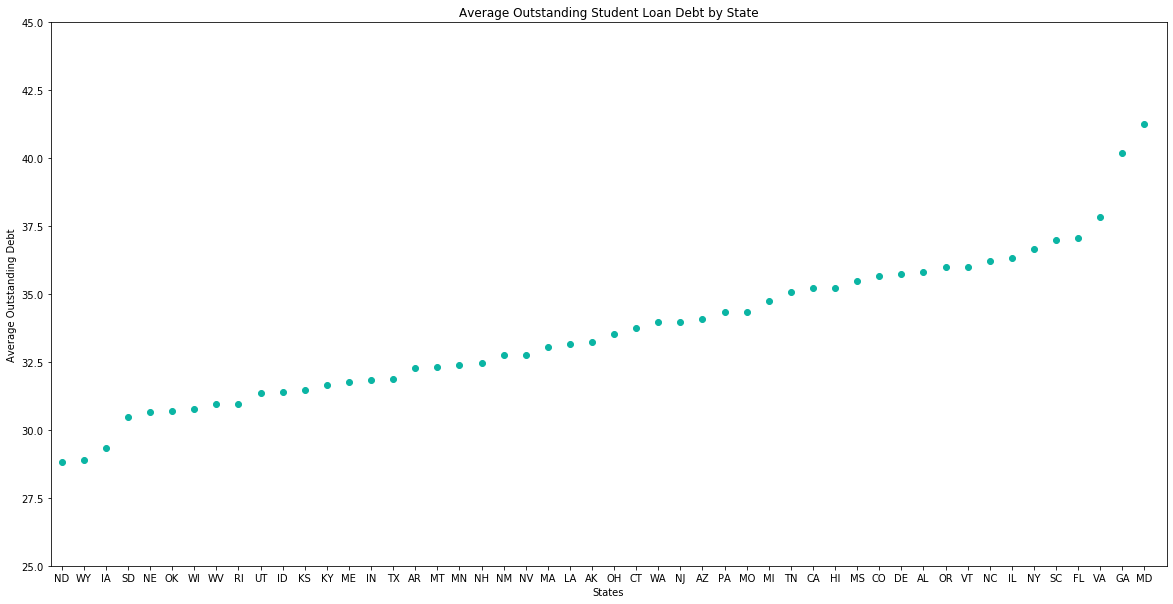

In [90]:
#PLOTTING STATE VS AVERAGE DEBT OUSTANDING PER BORROWER IN ASCENDING ORDER
plt.figure(figsize=(20,10))
plt.scatter(sorted_avg1['State'],sorted_avg1['Average Balance (in thousands)'],
            c='#0bb5a4', marker='o')
plt.ylim(25,45)
plt.xlim(-.5,50)
plt.title('Average Outstanding Student Loan Debt by State')
plt.xlabel('States')
plt.ylabel('Average Outstanding Debt')
plt.show();

In [91]:
print('Average Outstanding Debt per person(in thousands):',round(location.describe().iloc[1,0] / location.describe().iloc[1,1] * 1000,5))

Average Outstanding Debt per person(in thousands): 34.63827


In [92]:
#AVERAGE OUTSTANDING DEBT BY AGE RANGE
debt_by_age = pd.DataFrame(p['Avg Debt'])
debt_by_age

,Avg Debt
24,14.7664
25,34.3478
35,45.1259
50,42.8196
62,41.4717


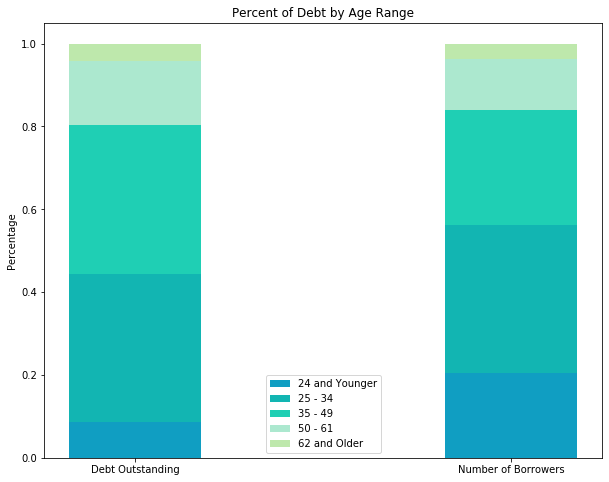

In [96]:
plt.figure(figsize=(10,8))

N = 2 # NUMBER OF BARS (one for % of debt, and % of borrowers per age)
p24 = percent_debt_and_borrowers1.T.iloc[1,[1,3]] #selecting %debt and %borrowers 24 and younger
p25 = percent_debt_and_borrowers1.T.iloc[2,[1,3]]
p35 = percent_debt_and_borrowers1.T.iloc[3,[1,3]]
p50 = percent_debt_and_borrowers1.T.iloc[4,[1,3]]
p62 = percent_debt_and_borrowers1.T.iloc[5,[1,3]]

ind = np.arange(N)
width = .35

#stacking bar at y coordinate
p1 = plt.bar(ind, p24, width, color = '#109ec2')
p2 = plt.bar(ind, p25, width, bottom=p24, color = '#12b5b2') 
p3 = plt.bar(ind, p35, width, bottom=p24 + p25,
             color ='#1fcfb4') 
p4 = plt.bar(ind, p50, width, bottom=p24 + p25 + p35,
             color = '#ace8cf')
p5 = plt.bar(ind, p62, width, bottom=p24 + p25 + p35 + p50,
             color = '#bee8ac')


plt.ylabel('Percentage')
plt.title('Percent of Debt by Age Range')
plt.xticks(ind, ('Debt Outstanding', 'Number of Borrowers'))
plt.legend((p1[0], p2[0],p3[0],p4[0],p5[0]), ('24 and Younger', '25 - 34',
                                              '35 - 49','50 - 61',
                                              '62 and Older'))
plt.savefig('bar.png',dpi=400)
plt.show()


# Map

In [97]:
#Getting df want to use
avg_location_age.head(2)

,State,24- Avg Bal (in thousands),25-34 Avg Bal (in thousands),35-49 Avg Bal(in thousands),50-61 Avg Bal (in thousands),62+ Avg Bal (in thousands)
0,AL,14.75,35.08,47.91,41.89,37.50
1,AK,11.43,29.92,42.57,42.31,43.48


In [99]:
#Removing all but 24 and younger age range
avg_location_24 = avg_location_age.copy()
avg_location_24 = avg_location_24.drop(columns=['25-34 Avg Bal (in thousands)',
                                                '35-49 Avg Bal(in thousands)',
                                                '50-61 Avg Bal (in thousands)',
                                                '62+ Avg Bal (in thousands)'])
avg_location_24.sample(5)

,State,24- Avg Bal (in thousands)
6,CT,16.41
39,PR,9.22
45,UT,10.25
17,KY,14.17
30,NJ,16.20


In [100]:
import plotly.graph_objects as go

df = avg_location_24

fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['24- Avg Bal (in thousands)'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'edge',
    colorbar_title = "Thousands USD",
))

fig.update_layout(
    title_text = '2019 US Average Outstanding Student Loan Debt by State Owed by Borrowers 24 Years Old and Younger ',
    geo_scope='usa', # limit map scope to USA
)

fig.show()

#rdbu #icefire #edge #geyser


In [101]:
sorted_avg.head(1)

,Location,State,Balance (in billions),Borrowers (in thousands),Average Balance (in thousands)
39,Puerto Rico,PR,8.1,320.1,25.3


In [102]:
df = sorted_avg

fig = go.Figure(data=go.Choropleth(
    locations=df['State'], # Spatial coordinates
    z = df['Average Balance (in thousands)'].astype(float), # Data to be color-coded
    locationmode = 'USA-states', # set of locations match entries in `locations`
    colorscale = 'ylgnbu',
    colorbar_title = "Thousands USD",
))

fig.update_layout(
    title_text = '2019 US Average Outstanding Debt by State',
    geo_scope='usa', # limite map scope to USA
)

fig.show()